In [1]:
from compute import Var, Par, Model, adda, addf, ureg, Evaluable, buildidpvars
from compute import RefNode, SolverNode, addsolver, geteqs, END
from representations import render_tree, digraph_repr, drawfull
from notation import graphs_from_incidence, make_acyclic, solvers_bottom_up, generate_execution
from datastructures import notation_from_tree
from operators import merge_pure
from anytree import LevelOrderIter
import networkx as nx

In [2]:
x,c,d = Var('x'), Var('c'), Var('d')

In [3]:
model = Model()
m = RefNode(name='/', ref=model)
y = adda(m, 'y', x)
a = adda(m, 'a', c+y)
b = adda(m, 'b', a)
r_3 = addf(m, b+d)
r_4 = addf(m, a+d)
s2 = addsolver(m, [], [(r_4, d)], name='s2')
e = adda(m, 'e', c+b)

In [4]:
f_0, f_1, f_2 = geteqs(m, [y,a,b])
s1 = addsolver(m, [f_0, f_1, f_2, s2], [(r_3, c)], name='s1') # could still be cyclic at this point

In [5]:
render_tree(m, True)

/               
├── f_5, INTER  
└── s1, SOLVER  
    ├── f_0, INTER
    ├── f_1, INTER
    ├── f_2, INTER
    ├── s2, SOLVER
    │   └── r_4, END
    └── r_3, END


In [7]:
G, graphs = graphs_from_incidence(m, True)

In [8]:
m2 = make_acyclic(m, graphs)

In [9]:
render_tree(m2, True)

/               
├── s1, SOLVER  
│   ├── f_0, INTER
│   ├── f_1, INTER
│   ├── s2, SOLVER
│   │   └── r_4, END
│   ├── f_2, INTER
│   └── r_3, END
└── f_5, INTER  


# Force order

In [8]:
order=[f_2,f_1,s2,f_0]

In [9]:
G, graphs = graphs_from_incidence(s1)

In [14]:
G_order = graphs[s1]

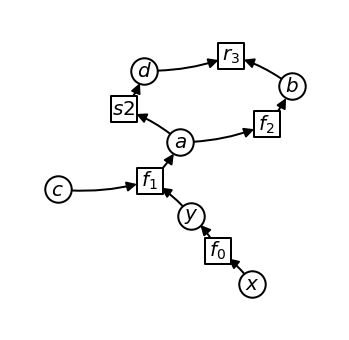

In [15]:
drawfull(G_order, model.eqs)

In [26]:
G_order[f_2]

AtlasView({b: {}})

In [27]:
outs = [node for elt in order for node in G_order.successors(elt)]

In [28]:
outs

[b, a, d, y]

In [38]:
solvefor = dict()
while order:
    fx = order.pop(0)
    outs = [node for elt in order for node in G_order.successors(elt)]
    for var in G_order.predecessors(fx):
        if var in outs:
            solvefor[fx] = var

In [39]:
solvefor

{<f_2>: a, <f_1>: y}

In [40]:
# need to convert these to end components